# Using the Euler solver

`ppmpy` provides an `Euler` class that solves the Euler equations using PPM.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ppmpy import Euler

## Sod problem

Here we do an example of the Euler solver running the standard Sod problem.  The initial conditions
for this are provided by the `ppmpy.initial_conditions` module.

In [3]:
from ppmpy.initial_conditions import sod

We setup the Euler solver by telling it the number of zones, CFL number, and the initial condition function to use.

In [4]:
nx = 64
C = 0.5
e = Euler(nx, C, init_cond=sod)

We can then evolve--here we evolve for 0.2 s.  We set `verbose=False` to suppress the output of the timestepping.

In [5]:
e.evolve(0.2, verbose=False)

Finally a plot.

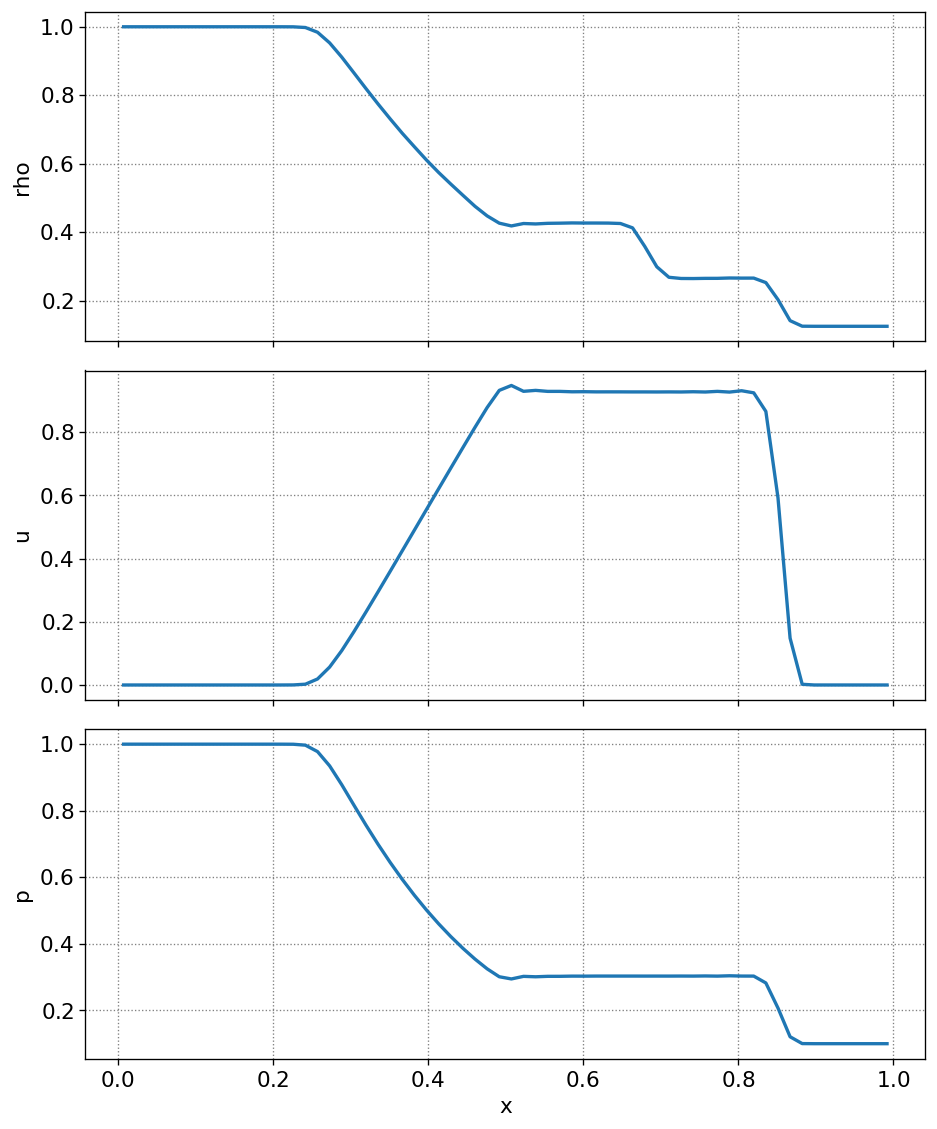

In [6]:
fig = e.plot_prim()

We can also visualize the parabolia reconstruction.  Here's the pressure near the shock.

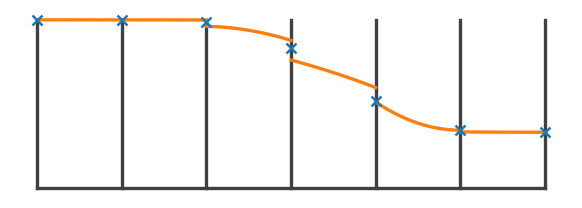

In [7]:
gp = e.grid.draw(lo_index=55, hi_index=60, stretch=2)
e.draw_prim(gp, e.v.qp)

We can also show to which interface each of the 3 characteristic waves moved in each cell by drawing their domain of dependence.

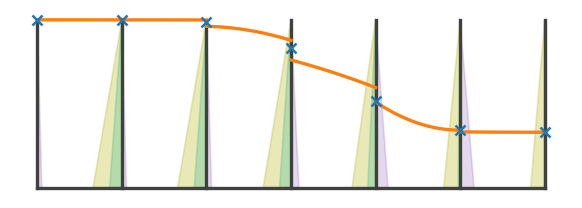

In [8]:
e.draw_waves(gp)
gp.fig

## Custom initial conditions

Let's setup our own initial conditions for a general shock tube.  We will want to be able to pass parameters to the initial condition function to set the left and right state--this is accomplished by setting the `params` keyword argument in the `Euler` class to a dictionary with the parameters.

The ratio of specific heats, $\gamma$, is provided in `params` as well.  If not explicitly set when `params` is passed it, and default value of $1.4$ will be
used.

Here's our new initial conditions:

In [9]:
def shock_tube(euler):

    gamma = euler.params["gamma"]
    
    rho_l = euler.params["rho_l"]
    u_l = euler.params["u_l"]
    p_l = euler.params["p_l"]
    rho_r = euler.params["rho_r"]
    u_r = euler.params["u_r"]
    p_r = euler.params["p_r"]

    idx_l = euler.grid.x < 0.5
    idx_r = euler.grid.x >= 0.5

    euler.U[idx_l, euler.v.urho] = rho_l
    euler.U[idx_l, euler.v.umx] = rho_l * u_l
    euler.U[idx_l, euler.v.uener] = p_l/(gamma - 1.0) + 0.5 * rho_l * u_l**2

    euler.U[idx_r, euler.v.urho] = rho_r
    euler.U[idx_r, euler.v.umx] = rho_r * u_r
    euler.U[idx_r, euler.v.uener] = p_r/(gamma - 1.0) + 0.5 * rho_r * u_r**2

Let's do a double rarefaction / vacuum problem

In [10]:
params = {"rho_l": 2.0, "u_l": -2.0, "p_l": 1.0,
          "rho_r": 2.0, "u_r": 2.0, "p_r": 1.0}
e = Euler(nx, C, init_cond=shock_tube, params=params)
e.evolve(0.1, verbose=False)

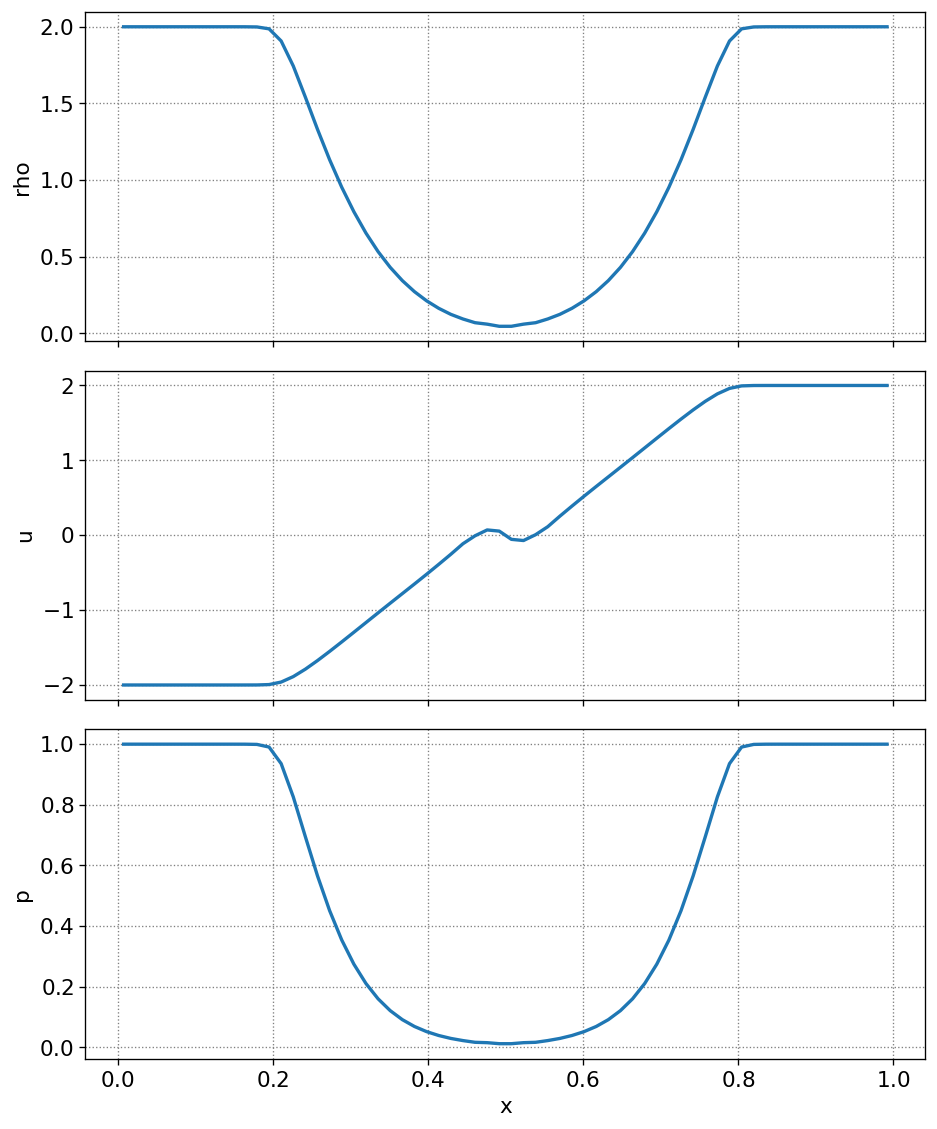

In [11]:
fig = e.plot_prim()